### 分布

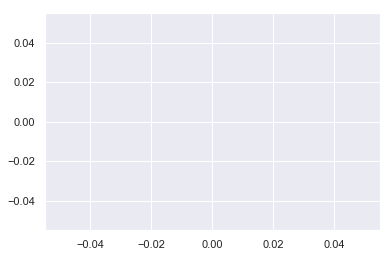

In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes = True)
np.random.seed(sum(map(ord,'distributions')))

plt.plot()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


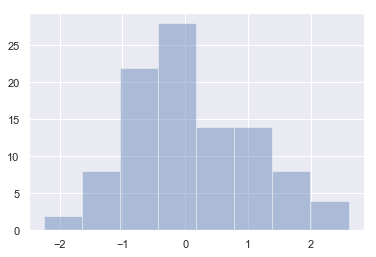

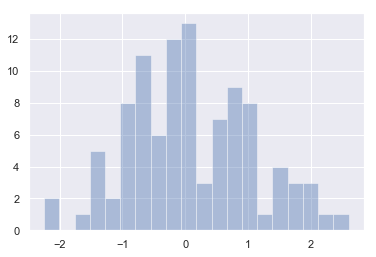

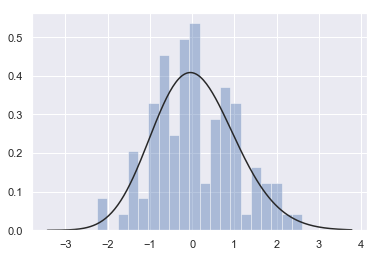

In [18]:
x = np.random.normal(size =100)
#kde 表示是否需要核密度估计
sns.distplot(x,kde=False)
plt.show()
#bins 表示划分多少个单元
sns.distplot(x,bins =20,kde=False)
plt.show()

#stats.gamma 统计指标
sns.distplot(x,bins =20,kde=False,fit =stats.gamma)
plt.show()

根据均值和协方差生产数据

In [20]:
mean,  cov = [0,1],[(1,.5),(.5,1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=['x','y'])

观察两个变量之间的分布关系最好使用散点图

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


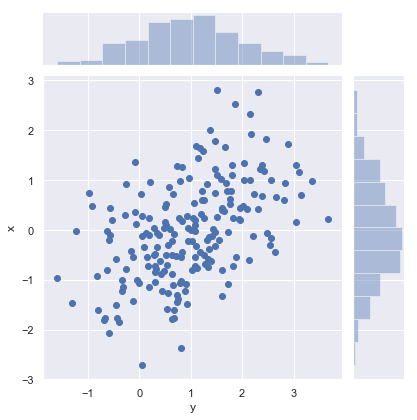

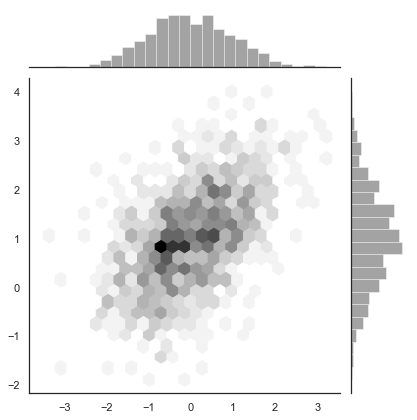

In [34]:
sns.jointplot(x='y',y='x',data =df)
plt.show()

x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style('white'):
    sns.jointplot(x=x,y=y, kind='hex', color ='k')

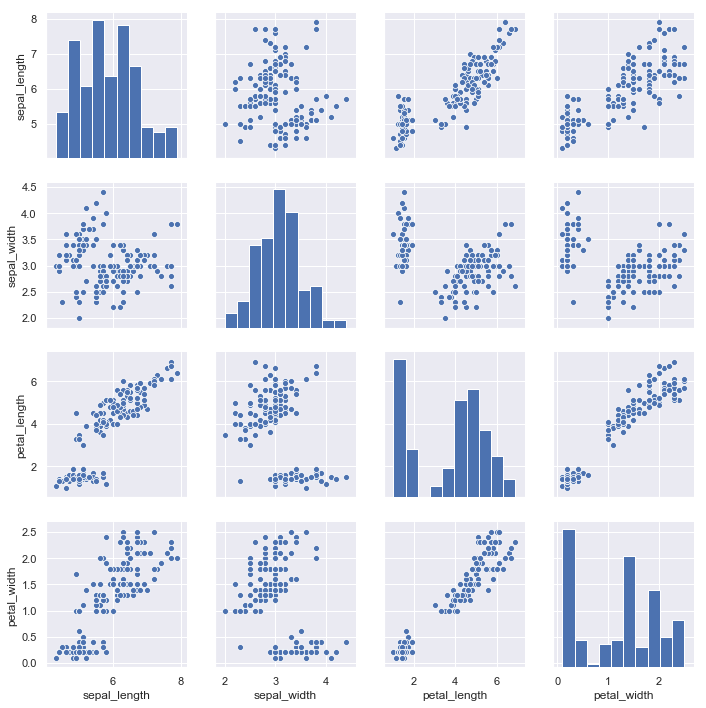

In [36]:
iris = sns.load_dataset('iris')
sns.pairplot(iris)

sepal 花萼  
petal 花瓣

### 回归分析

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate

sns.set(color_codes = True)
np.random.seed(sum(map(ord,'regression')))

tips = sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


regplot()和lmplot()都可以绘制回归关系，推荐使用regplot()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


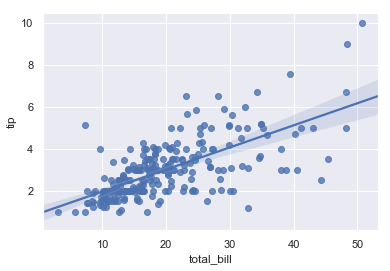

In [43]:
sns.regplot(x='total_bill',y='tip',data=tips)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


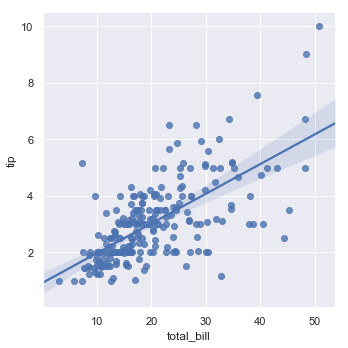

In [45]:
sns.lmplot(x='total_bill',y='tip',data=tips)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


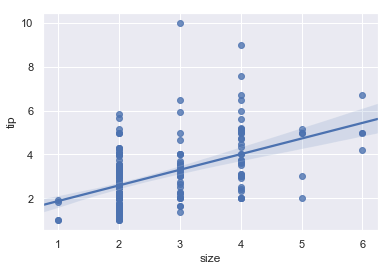

In [48]:
sns.regplot(data=tips, x='size',y='tip')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


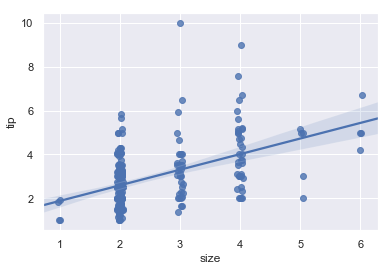

In [50]:
sns.regplot(data=tips, x='size',y='tip',x_jitter=.05)

### 分类

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate

sns.set(style='whitegrid', color_codes = True)
np.random.seed(sum(map(ord,'categorical')))


tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
titanic =  sns.load_dataset('titanic')

数据点重叠是很常见的现象，但是重叠影响我们观察数据。

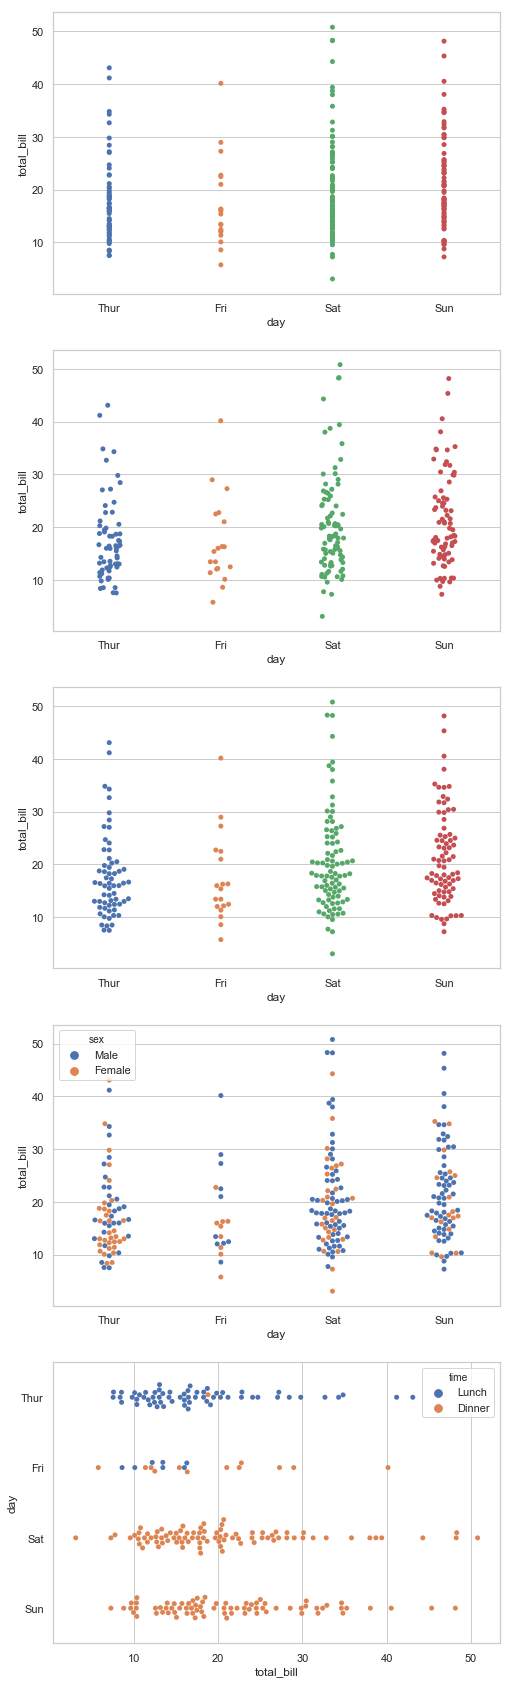

In [4]:
#默认是添加了抖动的，实际上数据不会重叠的很厉害，为了展示数据重叠，我们将数据抖动关闭
plt.figure(figsize=(8,30))
plt.subplot(511)
sns.stripplot(x='day', y='total_bill', data = tips, jitter=False)

#打开数据抖动
plt.subplot(512)
sns.stripplot(x='day', y='total_bill', data = tips, jitter=True)

#使用另外一只数据展现方式
plt.subplot(513)
sns.swarmplot(x='day', y='total_bill', data = tips)

#添加第三中需要关心的属性
plt.subplot(514)
sns.swarmplot(x='day', y='total_bill',hue='sex', data = tips)
plt.subplot(515)
sns.swarmplot(y='day', x='total_bill',hue='time', data = tips)
plt.show()

#### 盒图
* IQR即统计学概念中四分位距，第一/四分位与第三/四分位之间的距离；
* N = 1.5IQR 如果一个值 > Q3+N 或者 < Q1-N，则为离群点。

盒子的上下为1/4和3/4位，中间为1/2位置，在其上下分别为最大最小位置。

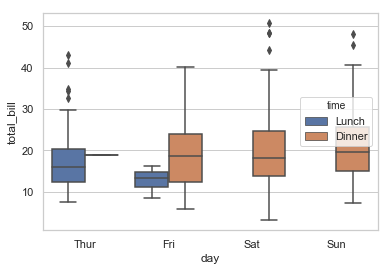

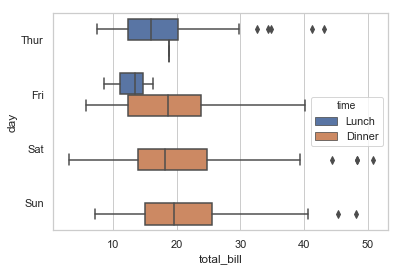

In [31]:
sns.boxplot(x='day', y = 'total_bill', hue='time', data = tips)
plt.show()
sns.boxplot(y='day', x = 'total_bill', hue='time', data = tips, orient='h')
plt.show()

#### 小提琴图

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


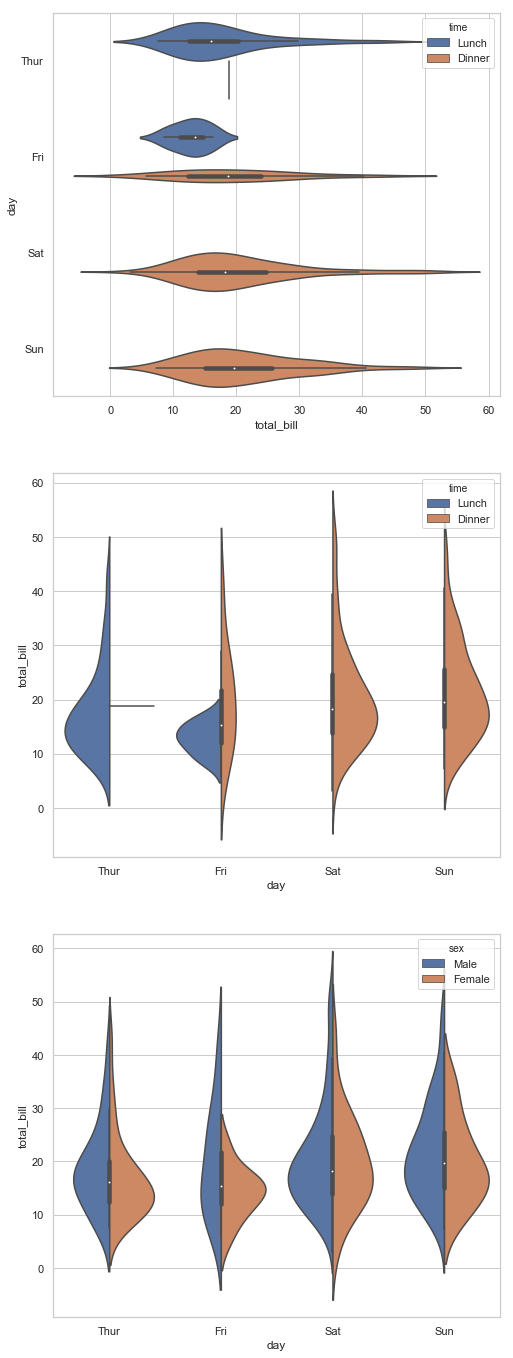

In [9]:
#sns.violinplot(y='day', x = 'total_bill', hue='time', data = tips)
#plt.show()
#sns.violinplot(x='day', y = 'total_bill', hue='time', data = tips, split=True)
#plt.show()
#sns.violinplot(x='day', y = 'total_bill', hue='sex', data = tips, split=True)
#plt.show()


plt.figure(figsize=(8,24))
plt.subplot(311)
sns.violinplot(y='day', x = 'total_bill', hue='time', data = tips)
#plt.show()
plt.subplot(312)
sns.violinplot(x='day', y = 'total_bill', hue='time', data = tips, split=True)
#plt.show()
plt.subplot(313)
sns.violinplot(x='day', y = 'total_bill', hue='sex', data = tips, split=True)
plt.show()

将两种图形结合起来，其中`alpha`指定透明度。

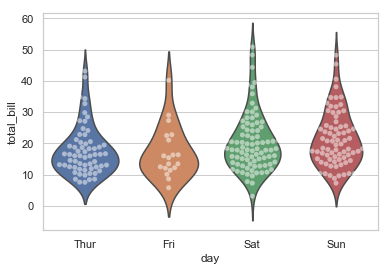

In [3]:
sns.violinplot(x='day', y='total_bill', data = tips, inner =None)
sns.swarmplot(x='day', y='total_bill', data = tips, color='w', alpha=.5)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


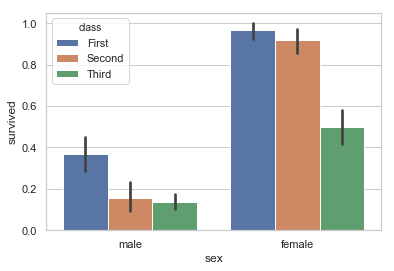

In [5]:
#显示值的集中趋势可以展示使用条形图
sns.barplot(x='sex', y='survived', hue='class',data=titanic)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


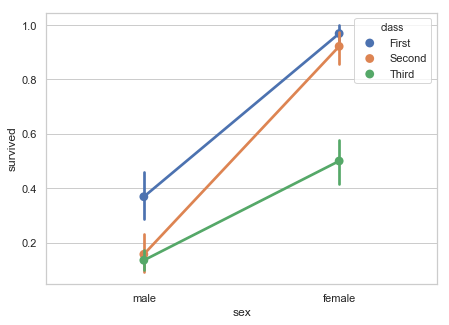

In [11]:
#点图能更好的描述变化差异
plt.figure(figsize=(7,5))
sns.pointplot(x='sex', y='survived', hue='class',data=titanic)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


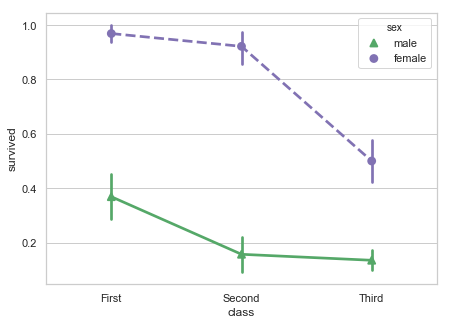

In [28]:
plt.figure(figsize=(7,5))
sns.pointplot(x='class', y='survived', hue='sex',data=titanic,
             palette={"male":"g", "female":"m"},
             markers=["^","o"], linestyles=['-','--'])
#print(help(sns.pointplot))

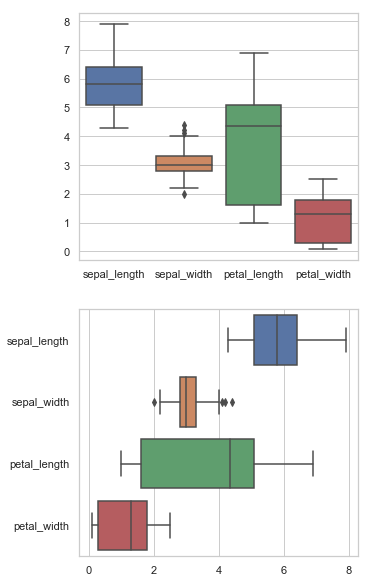

In [33]:
#盒图旋转XY轴
plt.figure(figsize=(5,10))
plt.subplot(211)
sns.boxplot(data=iris)
plt.subplot(212)
sns.boxplot(data=iris, orient='h')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` i

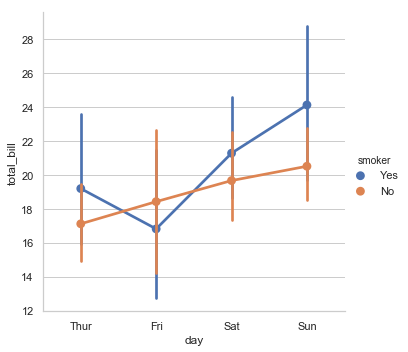

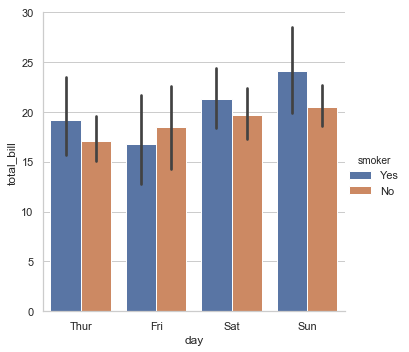

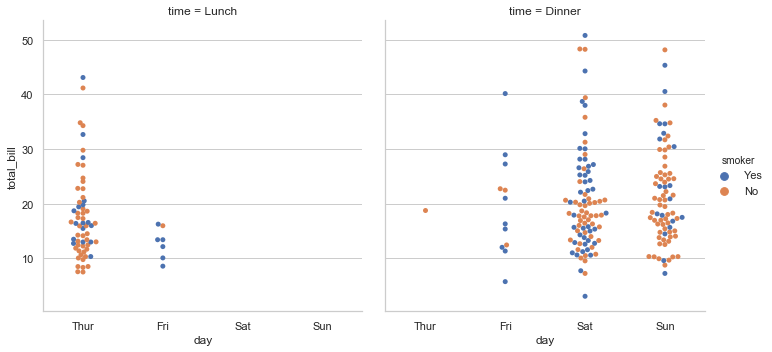

In [41]:
#多层面板分类图 factorplot
#可能需要使用catplot代替该函数了
sns.catplot(x='day', y='total_bill', hue='smoker', data=tips)
sns.catplot(x='day', y='total_bill', hue='smoker', data=tips, kind='bar')
sns.catplot(x='day', y='total_bill', hue='smoker',
               col='time', data=tips, kind='swarm')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


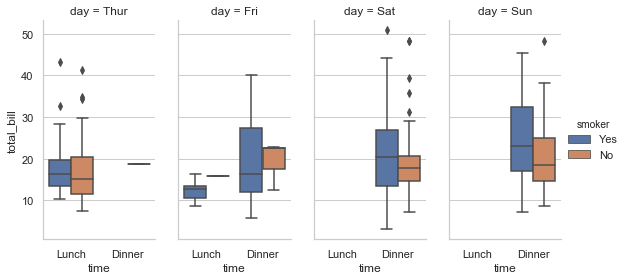

In [46]:
#aspect = width/high
sns.catplot(x='time', y='total_bill', hue='smoker',
               col='day', data=tips, kind='box',
               size=4, aspect=.5)

seaborn.catplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x000001396AA49400>, ci=95, n_boot=1000, units=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)

#### Parameters:
| * | name | desc  |
|---|:-----------------:|:----------------:|
| 1 | x,y,hue| 数据集变量，变量名|
|2 |data      |数据集，数据集名|
|3|row,col |  更多分类变量进行平铺显示，变量名| 
|4|col_wrap|每行的最高平铺数，整数|
|5|estimator|在每个分类中进行矢量到标量的映射,矢量|
|6|ci|置信区间，浮点数或者None|
|7|n_boot|计算置信区间时使用的引导迭代次数，整数|
|8|units|采样单元的标识符，用于执行多级引导和重新测量设计，数据变量或者向量数据|
|9|order,hue_order|对应排序列表，字符串列表|
|10|row_order,col_order|对应排序列表名，字符串列表|
|11|kind|可选：point(默认，点图)，bar(柱形图), count(频次), box(盒图), violin(提琴), strip(散点), swarm(分散点)|
|12|size|每个面的高度（英寸）,标量|
|13|aspect|纵横比，标量|
|14|orient|方向，'v'/'h'|
|15|color|颜色，matplotlib颜色|
|16|palette|调色板，seaborn颜色色板或字典|
|17|legend|hue的信息面板，True/False|
|18|legend_out|是否扩展图形并将信息框绘制到中心右边，True/False|
|19|share{x,y}|共享轴线，True/False|


In [57]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate

sns.set(style='whitegrid', color_codes = True)
np.random.seed(sum(map(ord,'axis_grids')))

In [58]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


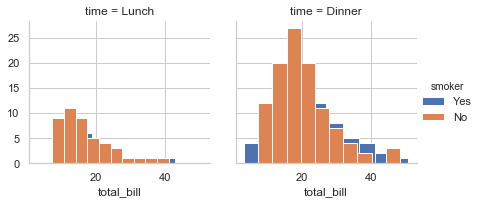

In [76]:
g = sns.FacetGrid(tips,col='time', hue='smoker') 
g.map(plt.hist,'total_bill')
g.add_legend()

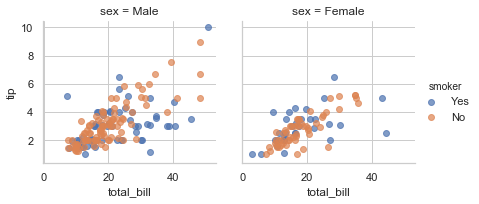

In [71]:
g=sns.FacetGrid(tips, col='sex', hue='smoker')
g.map(plt.scatter, 'total_bill', 'tip', alpha=.7)
#g.map(plt.hist, 'tip', alpha=.7)
g.add_legend() 

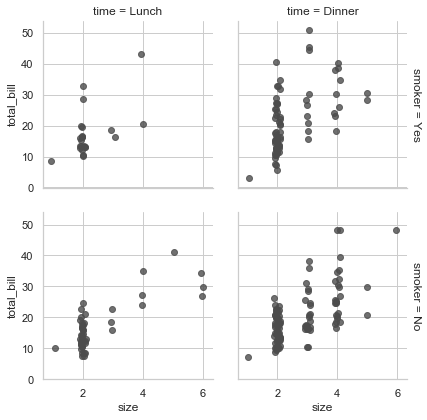

In [80]:
g=sns.FacetGrid(tips, row='smoker', col='time', margin_titles=True)
#fit_reg 是否显示回归线
#color 颜色深度
g.map(sns.regplot, 'size', 'total_bill', color='.3',
      fit_reg=False, x_jitter=.1)
#g.map(plt.hist, 'tip', alpha=.7)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


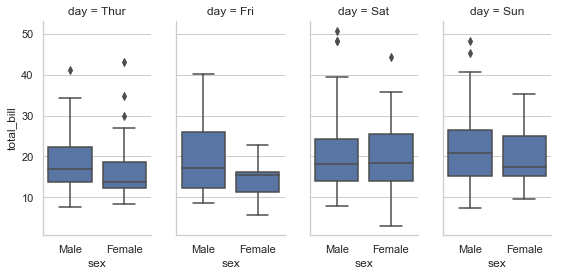

In [83]:
g=sns.FacetGrid(tips, col='day',size = 4, aspect=.5)
g.map(sns.boxplot, 'sex', 'total_bill')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


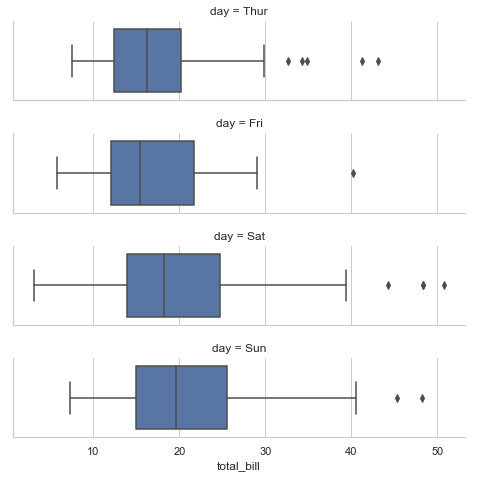

In [88]:
from pandas import Categorical
ordered_days = tips.day.value_counts().index
#顺序和我们需要使用的不一致，我们重新定义
ordered_days = Categorical(['Thur',  'Fri','Sat', 'Sun'])
#print(ordered_days)
g = sns.FacetGrid(tips, row='day', row_order = ordered_days, size=1.7, aspect=4)
g.map(sns.boxplot, 'total_bill')